# <font color='blue'>Problema de Estatística: diferença significativa produtividade dos empregados antes e depois do treinamento.
</font>

# 1 - Definindo o problema de negócio

### Uma empresa de tecnologia quer comparar a eficácia de dois métodos de treinamento diferentes em seus funcionários. Eles mediram a produtividade dos funcionários antes e depois do treinamento para ambos os métodos. A empresa deseja saber se há uma diferença significativa na produtividade dos funcionários antes e depois do treinamento para cada método.

# 2 - Decisões

### O problema de negócio é estatístico. O teste de Wilcoxon é adequado aqui porque:
### - É um teste não paramétrico usado para comparar duas amostras emparelhadas.
### - Não assume uma distribuição específica para os dados (por exemplo, normalidade).

# 3 - Versão python e import dos pacotes utilizados

In [17]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.4


In [18]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [19]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [20]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Danilo Temerloglou de Abreu" --iversions

Author: Danilo Temerloglou de Abreu

pandas    : 2.2.2
seaborn   : 0.13.2
matplotlib: 3.8.4
numpy     : 1.26.4



# 4 - Criando os Conjuntos de dados

In [21]:
# Definindo os dados de produtividade dos funcionários antes e depois do treinamento
np.random.seed(42)
produtividade_antes_metodo1 = np.random.normal(50, 10, 30)
produtividade_depois_metodo1 = produtividade_antes_metodo1 + np.random.normal(5, 10, 30)
produtividade_antes_metodo2 = np.random.normal(50, 10, 30)
produtividade_depois_metodo2 = produtividade_antes_metodo2 + np.random.normal(3, 10, 30)

In [22]:
# Criando um DataFrame para facilitar a visualização
data = {
    'Método': ['Método 1']*60 + ['Método 2']*60,
    'Período': ['Antes']*30 + ['Depois']*30 + ['Antes']*30 + ['Depois']*30,
    'Produtividade': np.concatenate([produtividade_antes_metodo1, produtividade_depois_metodo1, produtividade_antes_metodo2, produtividade_depois_metodo2])
}
df = pd.DataFrame(data)

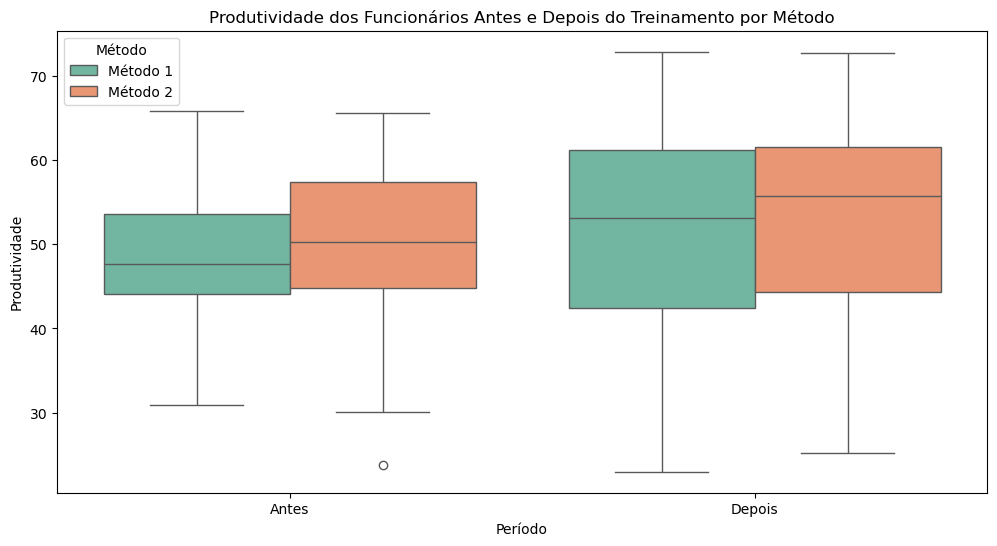

In [23]:
# Visualizando as distribuições com boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Período', y='Produtividade', hue='Método', data=df, palette='Set2')
plt.title('Produtividade dos Funcionários Antes e Depois do Treinamento por Método')
plt.xlabel('Período')
plt.ylabel('Produtividade')
plt.show()

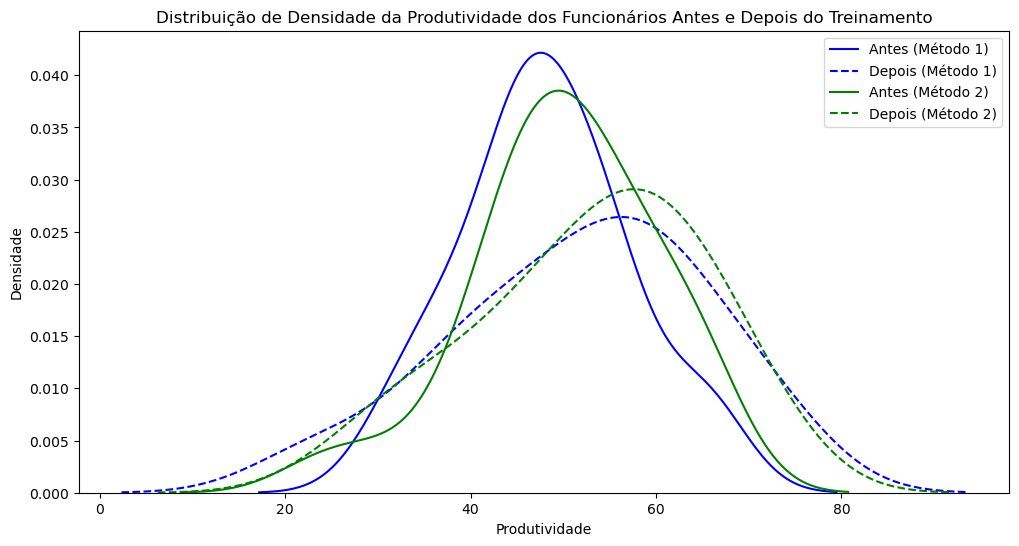

In [24]:
# Visualizando as distribuições com gráficos de densidade
plt.figure(figsize=(12, 6))
sns.kdeplot(produtividade_antes_metodo1, label='Antes (Método 1)', color='blue')
sns.kdeplot(produtividade_depois_metodo1, label='Depois (Método 1)', color='blue', linestyle='--')
sns.kdeplot(produtividade_antes_metodo2, label='Antes (Método 2)', color='green')
sns.kdeplot(produtividade_depois_metodo2, label='Depois (Método 2)', color='green', linestyle='--')
plt.title('Distribuição de Densidade da Produtividade dos Funcionários Antes e Depois do Treinamento')
plt.xlabel('Produtividade')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# 5 - Verificando as suposições, para aplicar o teste Kolmogorov-Smirnov:

## 5.1 Não assume que os dados seguem uma distribuição específica

### Não assumimos que os dados têm qualquer tipo de distribuição.

## 5.2 Amostras emparelhadas

### Pode ser usado para comparar duas amostras emparelhadas. Amostras emparelhadas (ou amostras dependentes) são conjuntos de dados em que cada observação em um conjunto tem uma correspondência direta com uma observação no outro conjunto. Isso significa que as duas amostras são coletadas em condições ou situações semelhantes, e cada par de observações está de alguma forma relacionado.

# 6 - Teste de hipóteses

## 6.1 Teste Wilcoxon

In [25]:
# Realizando o Teste de Wilcoxon para o Método 1
stat_metodo1, p_metodo1 = wilcoxon(produtividade_antes_metodo1, produtividade_depois_metodo1)
print(f'Estatística Wilcoxon (Método 1): {stat_metodo1}')
print(f'p-valor (Método 1): {p_metodo1}')

Estatística Wilcoxon (Método 1): 133.0
p-valor (Método 1): 0.04048972204327583


In [26]:
# Realizando o Teste de Wilcoxon para o Método 2
stat_metodo2, p_metodo2 = wilcoxon(produtividade_antes_metodo2, produtividade_depois_metodo2)
print(f'Estatística Wilcoxon (Método 2): {stat_metodo2}')
print(f'p-valor (Método 2): {p_metodo2}')


Estatística Wilcoxon (Método 2): 142.0
p-valor (Método 2): 0.0635564886033535


## 6.2 Análise do resultado

### O teste de Wilcoxon retorna uma estatística W e um p-valor. Se o p-valor for menor que um nível de significância (comumente 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa na produtividade dos funcionários antes e depois do treinamento.

In [27]:
# Interpretação dos resultados
if p_metodo1 < 0.05:
    print("Rejeitamos a hipótese nula para o Método 1. Há uma diferença significativa na produtividade antes e depois do treinamento.")
else:
    print("Não rejeitamos a hipótese nula para o Método 1. Não há evidências suficientes para afirmar que há uma diferença na produtividade antes e depois do treinamento.")

if p_metodo2 < 0.05:
    print("Rejeitamos a hipótese nula para o Método 2. Há uma diferença significativa na produtividade antes e depois do treinamento.")
else:
    print("Não rejeitamos a hipótese nula para o Método 2. Não há evidências suficientes para afirmar que há uma diferença na produtividade antes e depois do treinamento.")


Rejeitamos a hipótese nula para o Método 1. Há uma diferença significativa na produtividade antes e depois do treinamento.
Não rejeitamos a hipótese nula para o Método 2. Não há evidências suficientes para afirmar que há uma diferença na produtividade antes e depois do treinamento.


In [28]:
### Conclusão: 
### Método 1. Rejeitamos a hipótese nula. Há evidências estatisticas que há uma diferença significativa na produtividade antes e depois do treinamento.
### Método 2. Não rejeitamos a hipótese nula.Não há evidências estatísticas suficientes para afirmar que há uma 
### diferença na produtividade antes e depois do treinamento.

# Fim